In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
hb = pd.read_csv("haberman.csv")
hb
#change the values of the column names after checking from the website 

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [ ]:
hb1 = hb.rename({'30': 'Age','64':'Op_Year','1':'axil_nodes','1.1':'Surv_status'}, axis=1)
hb1

#surv_status is the target value here

,Age,Op_Year,axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


## **Haberman's Survival Data Set**

1. Age of patient at time of operation(numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
1 = the patient survived 5 years or longer, 2 = the patient died within 5 year

**Objective**: Classify whether a 
patient will survive 5 years or longer given the 3 features mentioned above

In [ ]:
print(hb1.shape)

(305, 4)


In [ ]:
print(hb1.columns)

Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')


In [ ]:
hb1["Surv_status"].value_counts()

1    224
2     81
Name: Surv_status, dtype: int64

**Observation**:
1. the dataset has (305, 4) samples and features respectively with zero null values.
2. imbalanced datasets, having 2 class
3. class 1 has 224 data-points, while class 2 has 81 data-points.

### **Data Preparation**



In [ ]:
haberman_survived = hb1.loc[hb1["Surv_status"] == 1]
haberman_not_survived = hb1.loc[hb1["Surv_status"] == 2]

print(haberman_survived.shape)
print(haberman_not_survived.shape)

(224, 4)
(81, 4)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


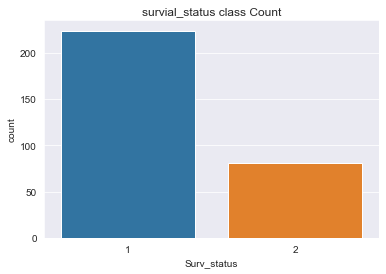

In [ ]:
sns.countplot(hb1.Surv_status);
plt.title("survial_status class Count");

## Bi-variate Analysis 

1. Scatter plot

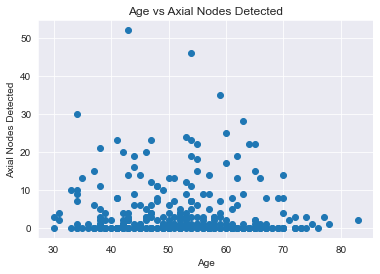

In [ ]:
plt.scatter(x="Age", y="axil_nodes", data=hb1);
plt.xlabel("Age")
plt.ylabel("Axial Nodes Detected")
plt.title("Age vs Axial Nodes Detected");

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


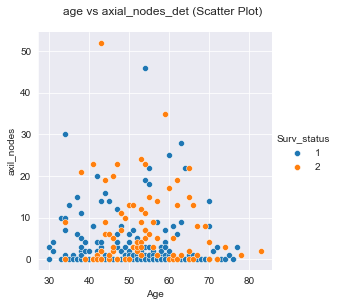

In [ ]:
sns.set_style("darkgrid")
grid = sns.FacetGrid(data=hb1, hue="Surv_status", size=4)
grid.map(sns.scatterplot, "Age", "axil_nodes")
grid.add_legend()
grid.fig.suptitle("age vs axial_nodes_det (Scatter Plot)", y=1.05);

**Observations:**
* if Age is upto 40 yrs, then greater probability that a patient will survive considering age vs axil_nodes_det (eventhough data is sckewed & need to perform further analysis)

2. Pair-Plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


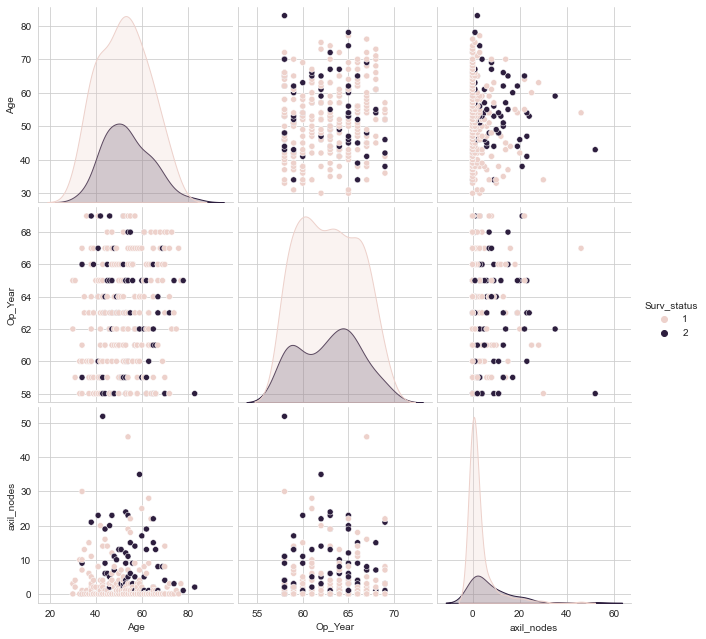

In [ ]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hb1, hue="Surv_status", size=3);
plt.show()

**Observations**:
1. there is some clusters aggreagted at the age vs axil_nodes_det feature plot. These two features seems quite important.
2. the op_year gives some-what mixed results with other features, which doesn't help much.

## Univariate analysis

1. Histograms and PDFs 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


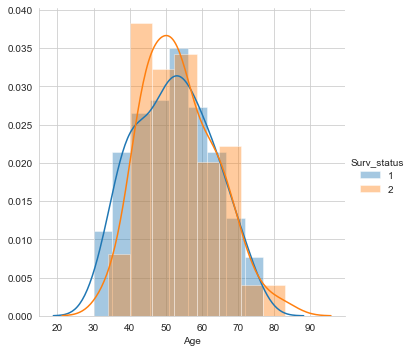

In [ ]:
sns.FacetGrid(hb1, hue="Surv_status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
grid.fig.suptitle("PDFs for Age")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


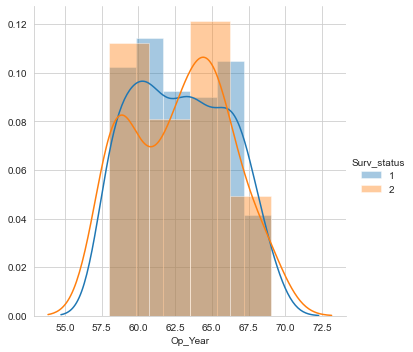

In [ ]:
sns.FacetGrid(hb1, hue="Surv_status", size=5) \
   .map(sns.distplot, "Op_Year") \
   .add_legend();
grid.fig.suptitle("PDFs Operation Year", y = 1.02)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


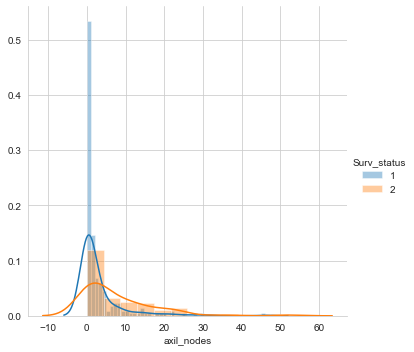

In [ ]:
sns.FacetGrid(hb1, hue="Surv_status", size=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
grid.fig.suptitle("PDFs for Axil nodes detected")
plt.show()

**Observations**:
1. if the persons age is less than ~42 there is higher probability of it's survival for more than 5 yrs.
2. for age greater than 42 yrs there is quite overlap but class 2 probability density i.e. (the patient died within 5 year) is quite higher.
3. having axil nodes less than 3 then there is higher probability that patient will survived greater than 5 yrs.

In [ ]:
print(f"Percentage of patients survival status:")
display(hb1.Surv_status.value_counts(normalize=True))

print("")
hb1.Surv_status.value_counts(normalize=False)

Percentage of patients survival status:


1    0.734426
2    0.265574
Name: Surv_status, dtype: float64

1    224
2     81
Name: Surv_status, dtype: int64

2. Cummulative Distribution Function (CDF)

PDF: [0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
bins: [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]

Non-survived
PDF: [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
bins: [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
--------------------------------------------------------------------------------------------------------------------------------------------


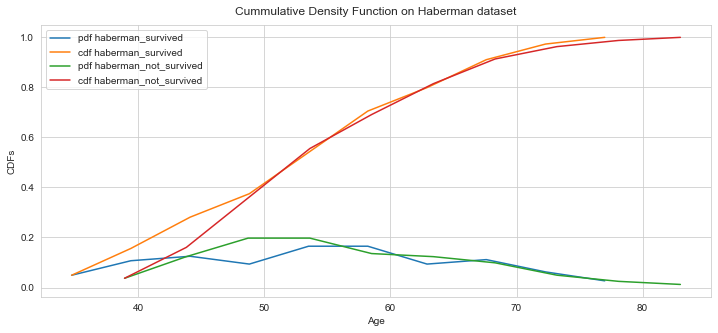

In [ ]:
#survived
plt.figure(figsize=(12, 5))
counts, bin_edges  = np.histogram(haberman_survived["Age"], bins=10, density=True)

pdf = counts/(sum(counts))
print(f"PDF: {pdf}")
print(f"bins: {bin_edges}")
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label= "pdf haberman_survived");
plt.plot(bin_edges[1:], cdf, label= "cdf haberman_survived");


## non-survived
print()
print("Non-survived")
counts, bin_edges  = np.histogram(haberman_not_survived["Age"], bins=10, density=True)

pdf = counts/(sum(counts))
print(f"PDF: {pdf}")
print(f"bins: {bin_edges}")
cdf = np.cumsum(pdf)

print("----"*35)
plt.plot(bin_edges[1:], pdf, label= "pdf haberman_not_survived")
plt.plot(bin_edges[1:], cdf, label= "cdf haberman_not_survived")
plt.xlabel("Age")
plt.ylabel("CDFs")
plt.legend()
plt.title("Cummulative Density Function on Haberman dataset", pad=10)
plt.show()


3. Box Plots

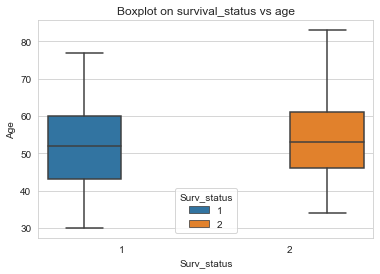

In [ ]:
sns.boxplot(x='Surv_status', y='Age', data=hb1, hue="Surv_status", width=0.9)
# plt.savefig("./boxplot_age.png", pad_inches=1)
plt.title('Boxplot on survival_status vs age')
plt.show()

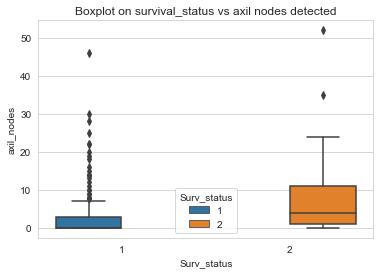

In [ ]:
sns.boxplot(x='Surv_status',y='axil_nodes', hue="Surv_status", data=hb1)
plt.title('Boxplot on survival_status vs axil nodes detected');

**Observations**:
From the above plot, we cannot separate survived & non-survived patients to greater extent as the IQRs are overlapping. Below are some observations--

*axil_nodes*
1. 75% of the patient survived greater than 5 yrs having axil nodes less than 3.
2. ~95% of the patient survived greater than 5 yrs having axil nodes less than 3. 6-7. Yes, there are outliners too inthe dataset.

*Age*

25% of the patient survived more than 5 yrs having age less than 43.


4.  Violin plots

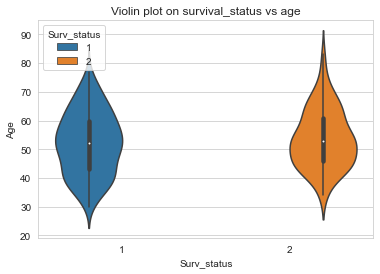

In [ ]:
sns.violinplot(x="Surv_status", y="Age", hue="Surv_status", data=hb1)
plt.title("Violin plot on survival_status vs age")
plt.show()

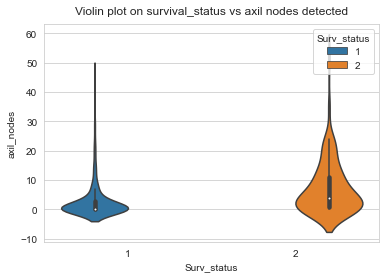

In [ ]:
sns.violinplot(x="Surv_status", y="axil_nodes", hue="Surv_status", data=hb1)
plt.title("Violin plot on survival_status vs axil nodes detected", pad=10)
plt.show()

**Observations**:

*axil_nodes*

As the axil nodes count increases, there is sharp decrease in life-expectancy.

*Age*

Patient survived greater than 5 yrs having age less than 43.


5. Joint Plots

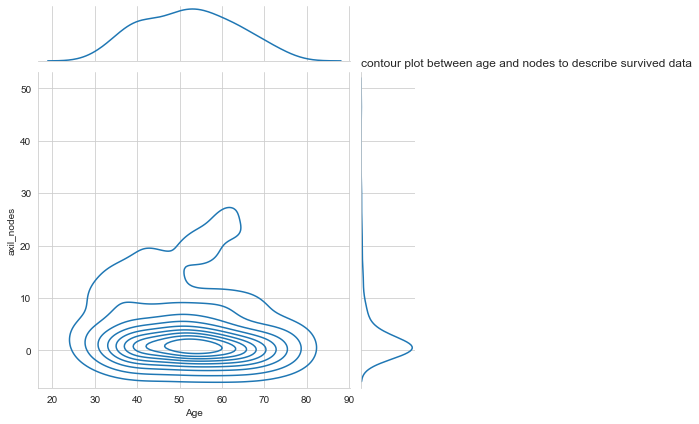

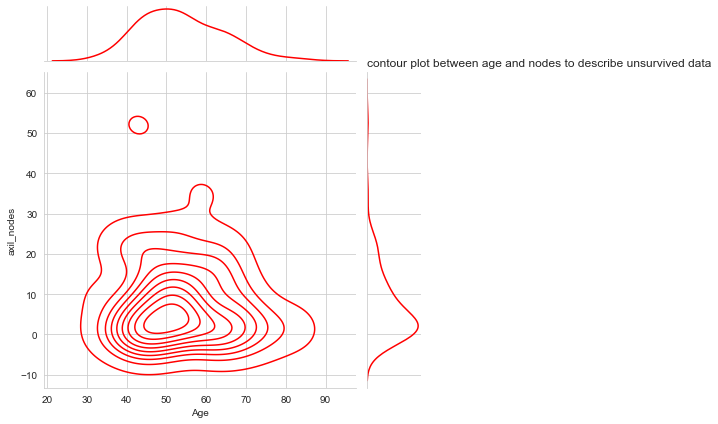

In [ ]:
sns.jointplot(x='Age',y='axil_nodes',data=haberman_survived,kind='kde')
plt.title("contour plot between age and nodes to describe survived data",loc='left')
sns.jointplot(x='Age',y='axil_nodes',data=haberman_not_survived,kind='kde',color='red')
plt.title("contour plot between age and nodes to describe unsurvived data",loc='left')
plt.show()

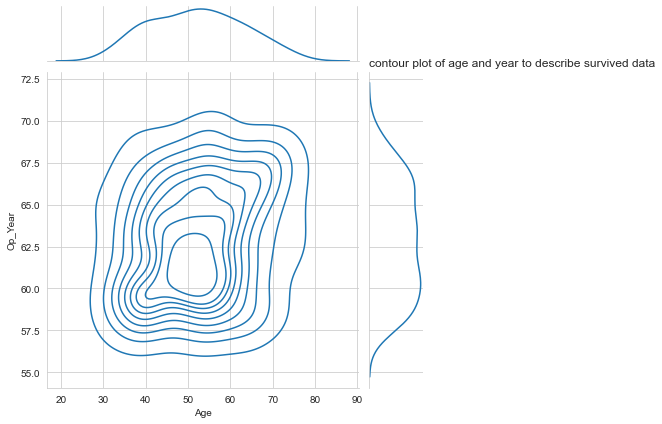

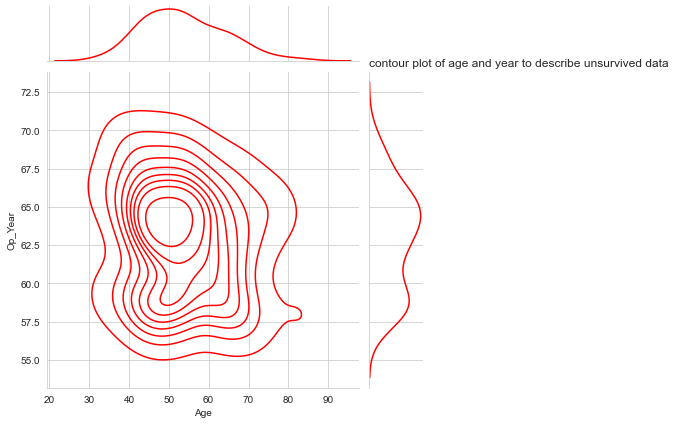

In [ ]:
sns.jointplot(x='Age',y='Op_Year',data=haberman_survived,kind='kde')
plt.title("contour plot of age and year to describe survived data",loc='left')
sns.jointplot(x='Age',y='Op_Year',data=haberman_not_survived,kind='kde',color='red')
plt.title("contour plot of age and year to describe unsurvived data",loc='left')
plt.show()

In [ ]:
from statsmodels import robust
print(robust.mad(hb1['Age']))

11.860817748044816


# Mean, Variance and Std-dev

In [ ]:
print("Means of age:\n")
print(np.mean(haberman_survived['Age']))
print(np.mean(haberman_not_survived['Age']))
print("\nStandard Deviation of Age:\n")
print(np.std(haberman_survived['Age']))
print(np.std(haberman_not_survived['Age']))

Means of age:

52.11607142857143
53.67901234567901

Standard Deviation of Age:

10.913004640364269
10.10418219303131


In [ ]:
print("Medians of Age:\n")
print(np.median(haberman_survived['Age']))
print(np.median(haberman_not_survived['Age']))

Medians of Age:

52.0
53.0


**Observation:**
1. The Patients survived- 224 , then the one who died -81 after 5 years of surgery .

2. The average value of age for the patients who survived after the surgery is 52.11

3. The average no of nodes for the paients who survived after the surgery is 2.79

4. 75% of people who survived have age less then 60 years of age.

5. No one above age of 75 survived.

6. No one with node count above 46 survived.

7. The average no of nodes in person who could not survive was 4.0.

8. 50 percentile of people surviving have node value equal to 0.